In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
df = pd.read_csv('sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [3]:
del df['sensor_15']
del df['Unnamed: 0']

In [4]:
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
df = df.drop_duplicates()
df.shape

(220320, 53)

In [6]:
def calculate_percentage_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

calculate_percentage_NAs(df).head(10)


,percent
sensor_50,0.349569
sensor_51,0.069821
sensor_00,0.046333
sensor_07,0.024741
sensor_08,0.023180
sensor_06,0.021777
sensor_09,0.020856
sensor_01,0.001675
sensor_30,0.001185
sensor_29,0.000327


In [7]:
df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [8]:
calculate_percentage_NAs(df).head(10)

,percent
sensor_01,0.001675
sensor_30,0.001185
sensor_29,0.000327
sensor_32,0.000309
sensor_18,0.000209
sensor_17,0.000209
sensor_22,0.000186
sensor_25,0.000163
sensor_16,0.000141
sensor_45,0.000123


In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219521 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       219521 non-null  object 
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [12]:
df = df.set_index('timestamp')

In [13]:
df.head(10)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,15.16204,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,15.08247,...,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL
2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,16.19647,15.08247,...,42.96875,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL
2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,15.47309,15.11863,...,42.18750,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL


In [14]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

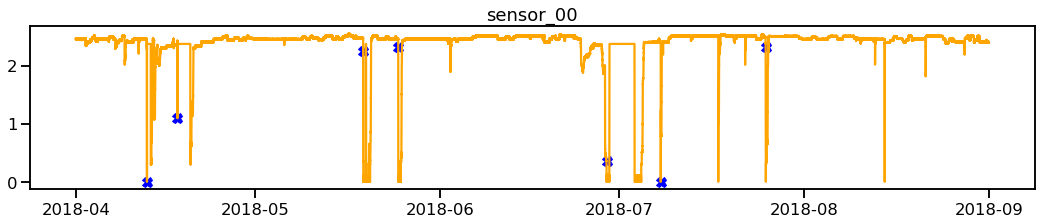

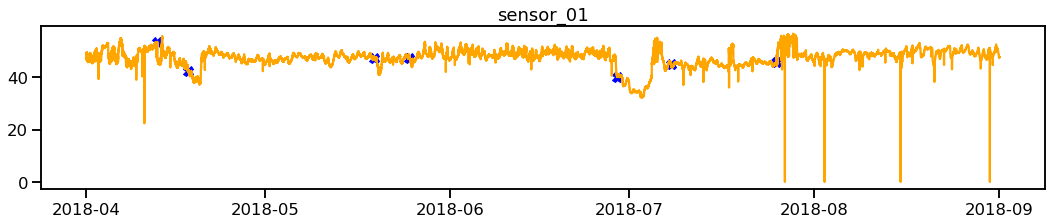

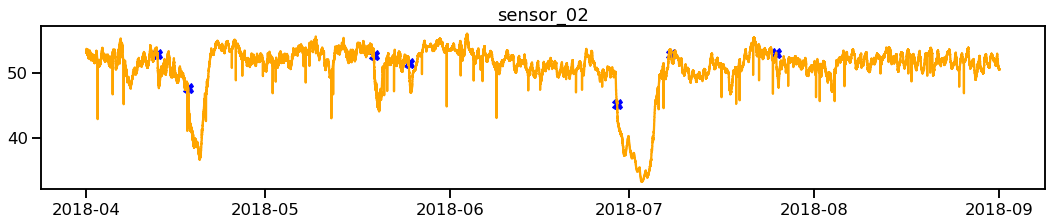

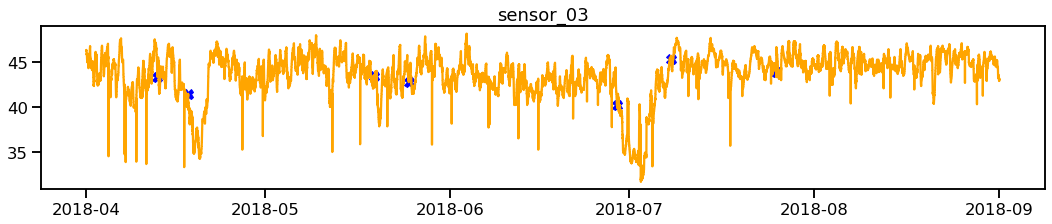

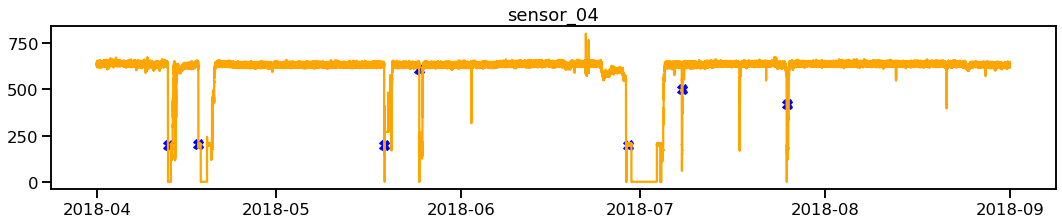

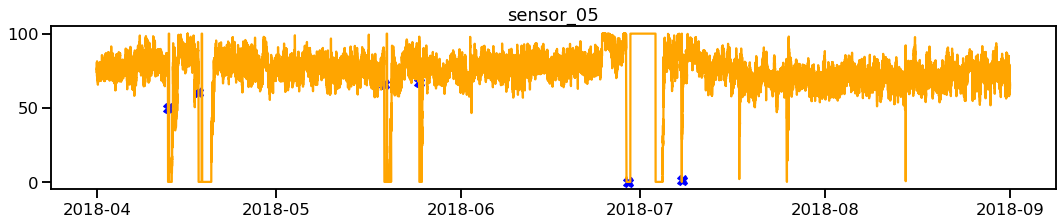

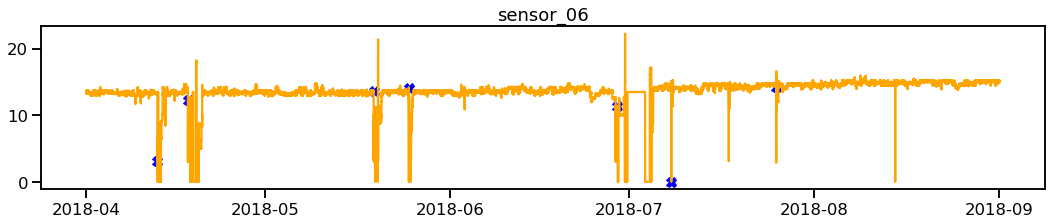

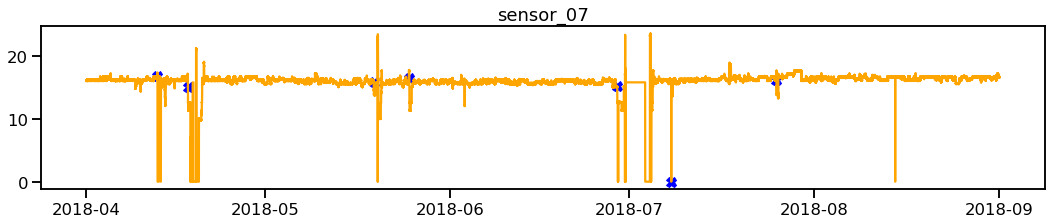

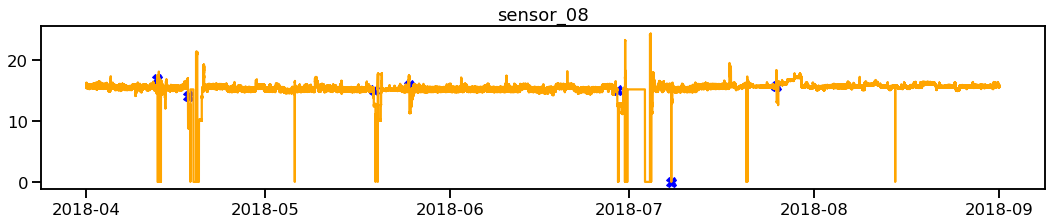

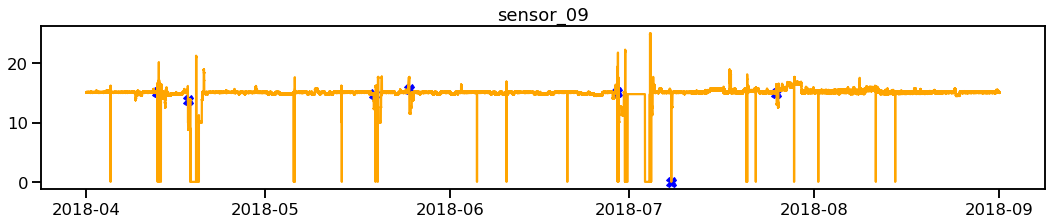

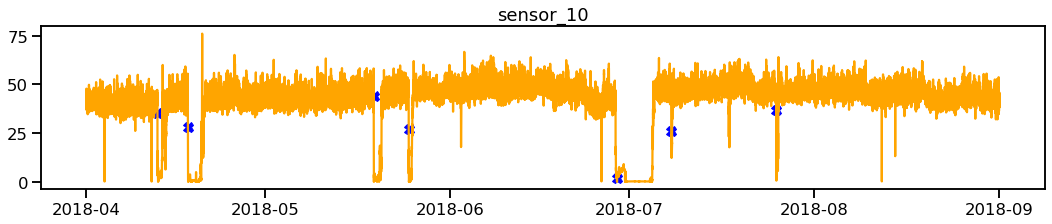

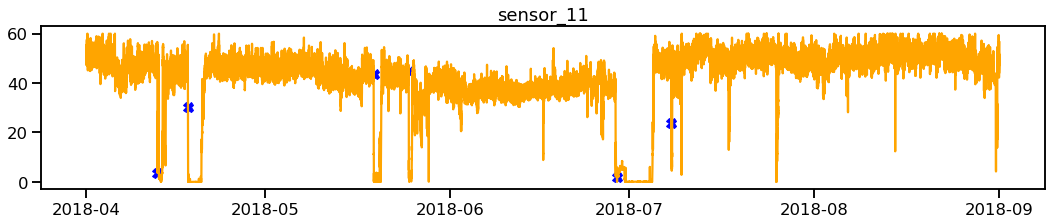

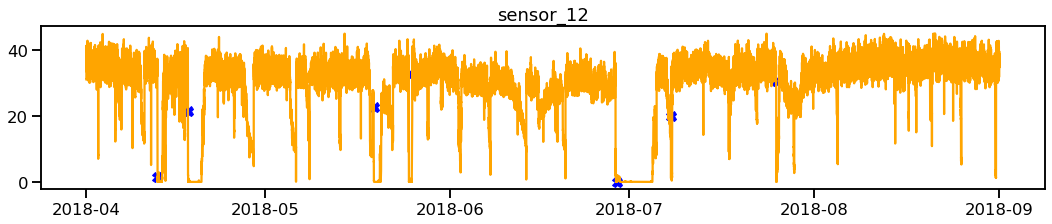

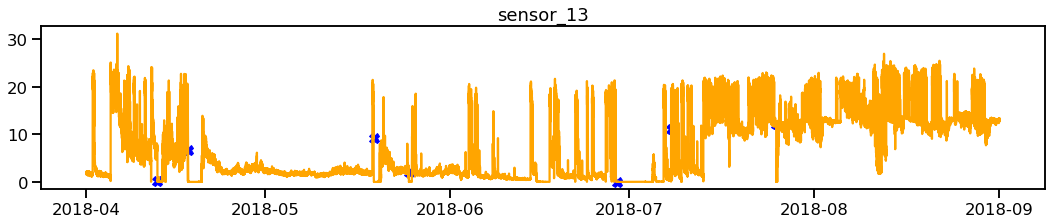

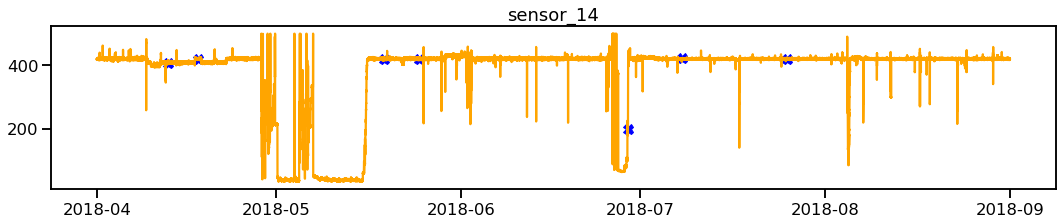

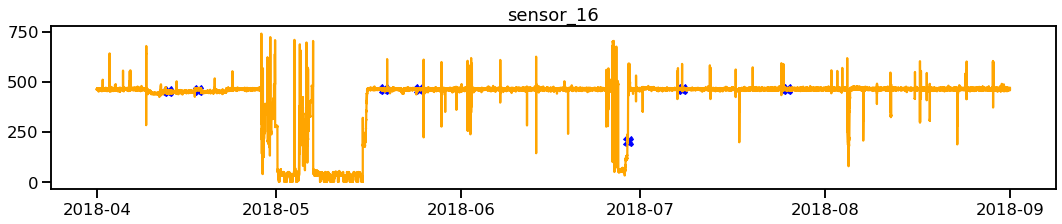

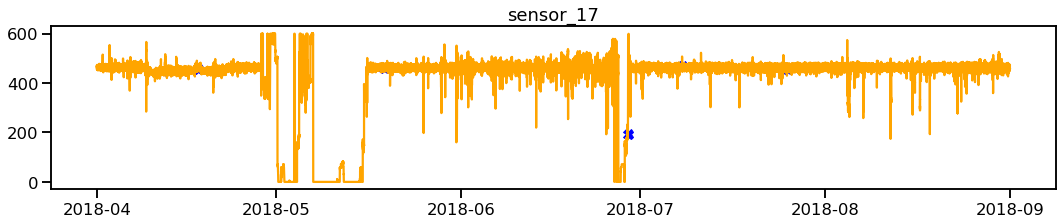

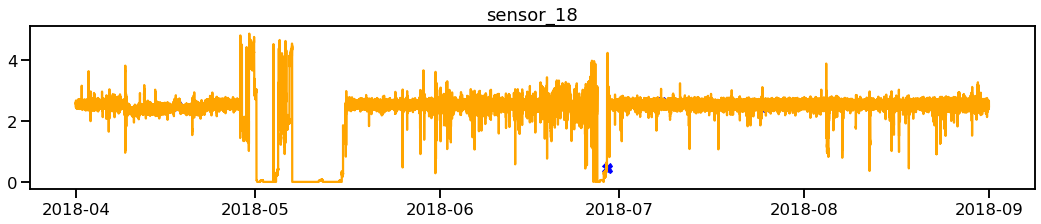

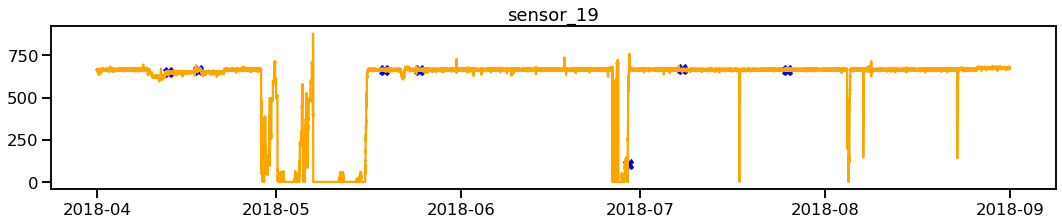

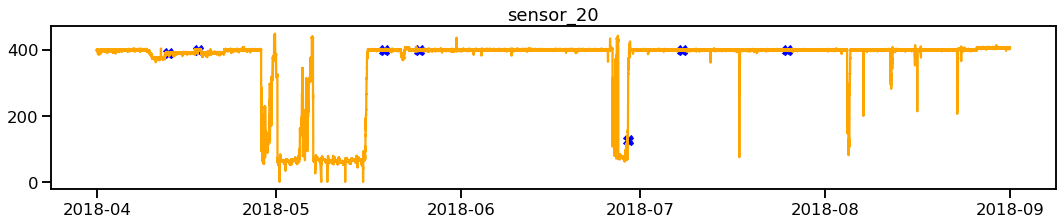

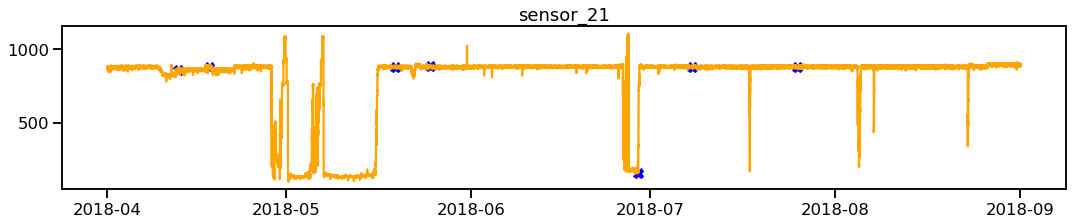

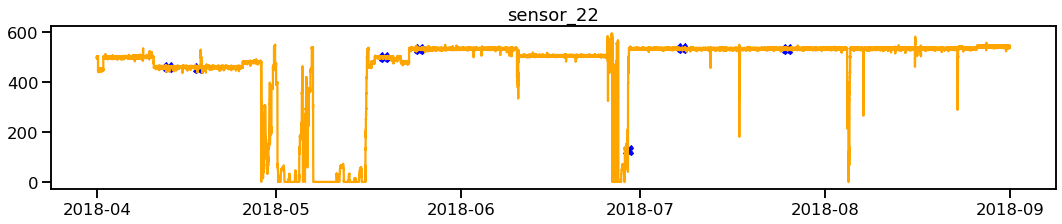

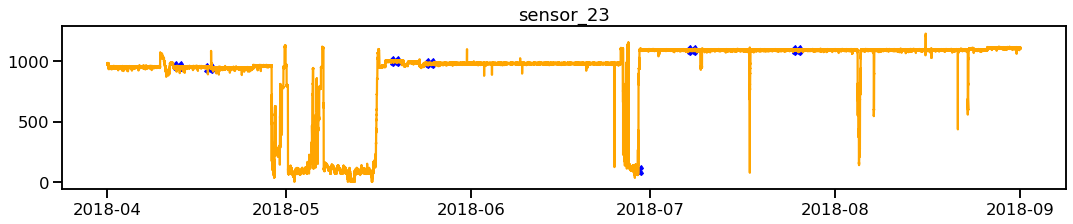

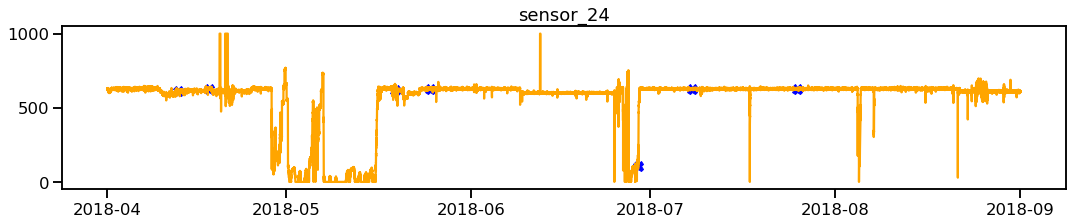

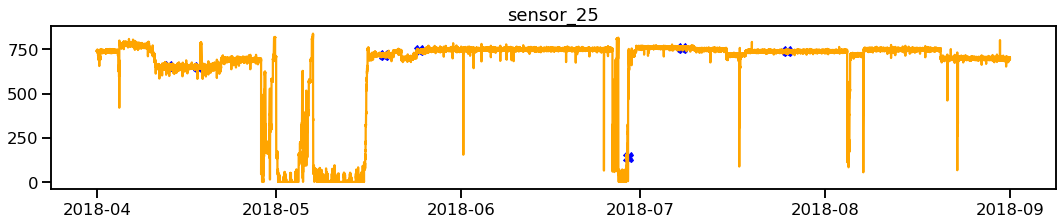

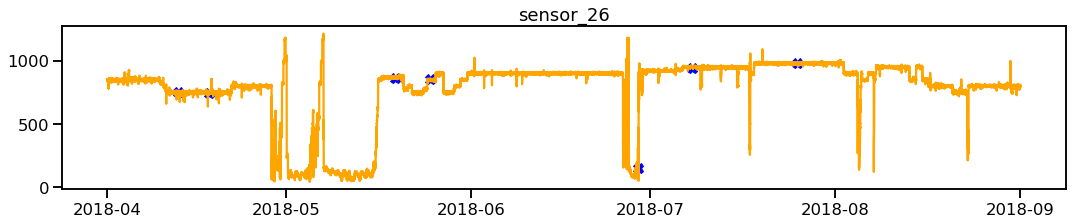

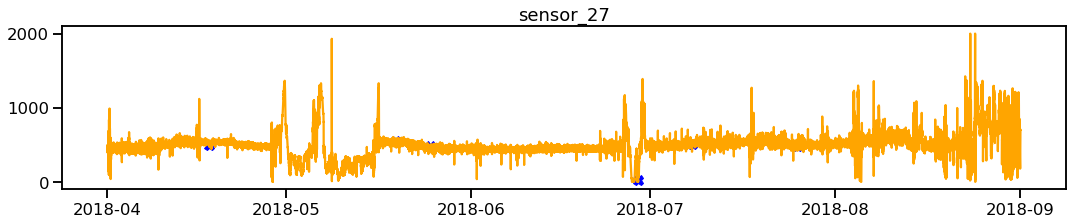

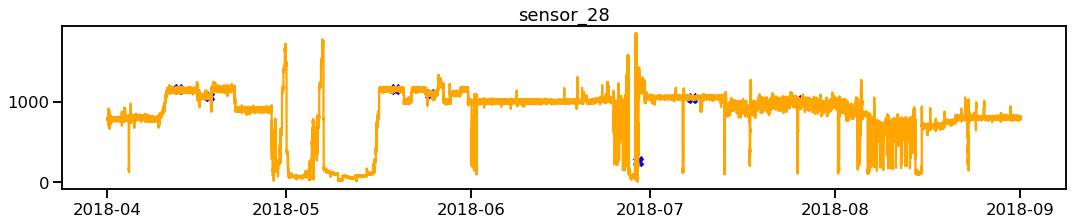

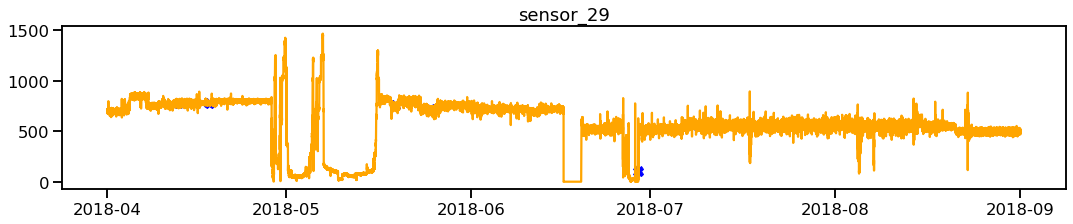

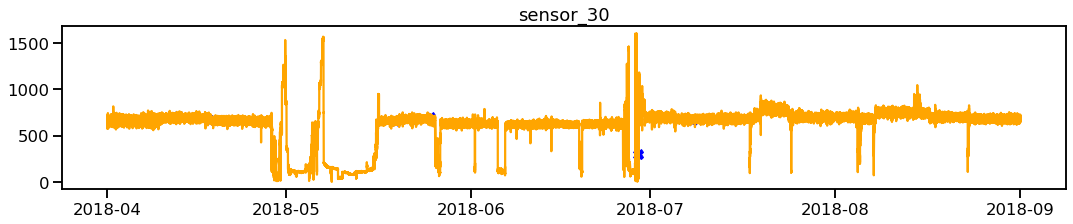

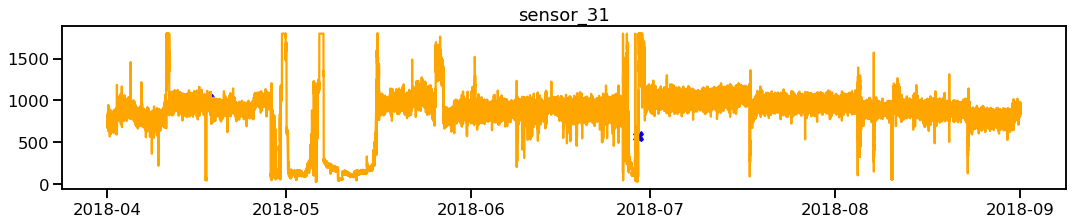

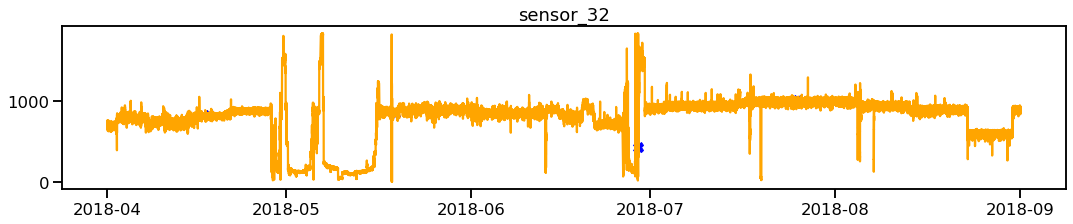

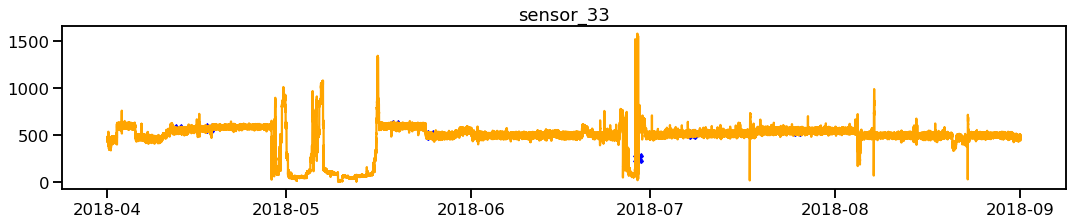

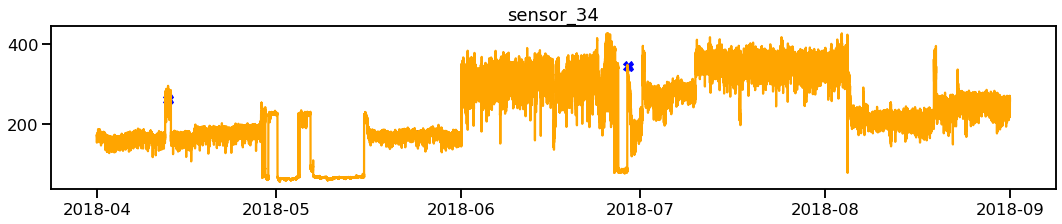

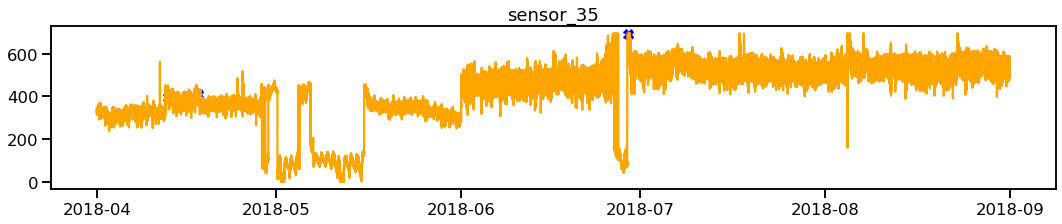

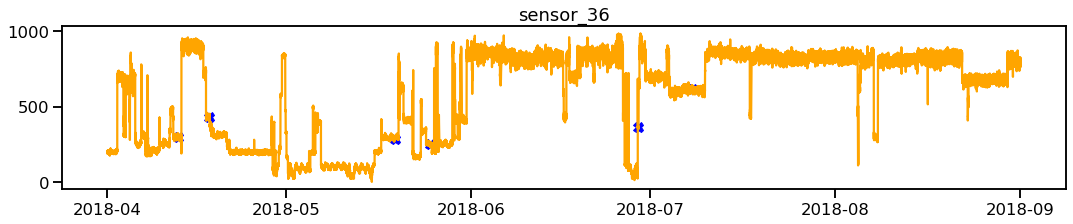

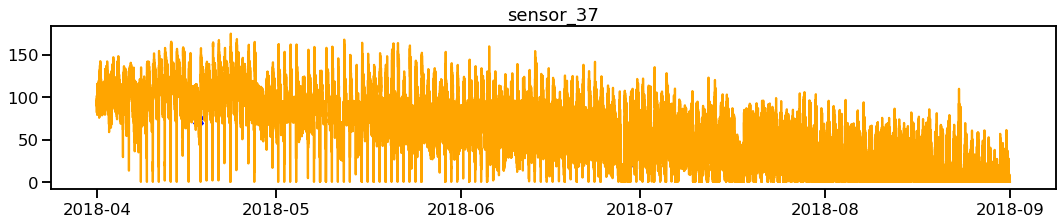

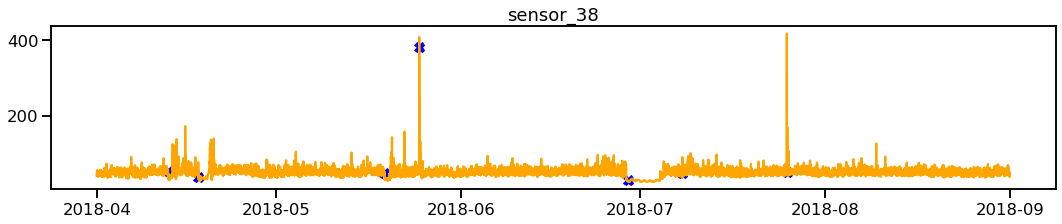

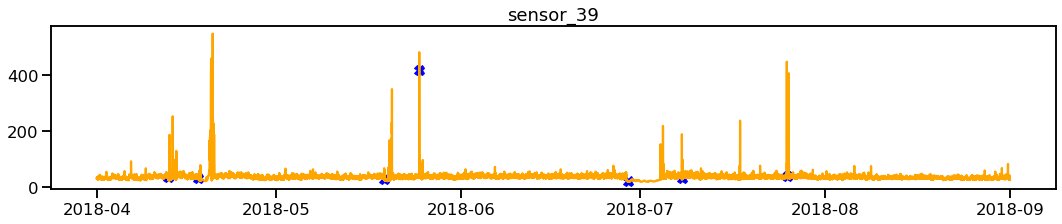

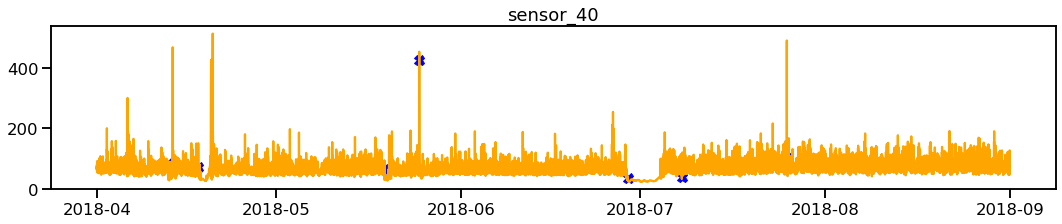

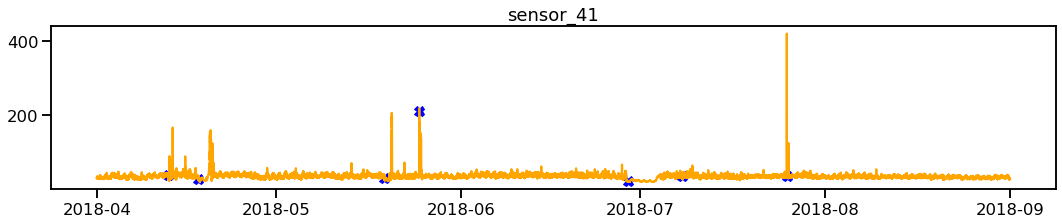

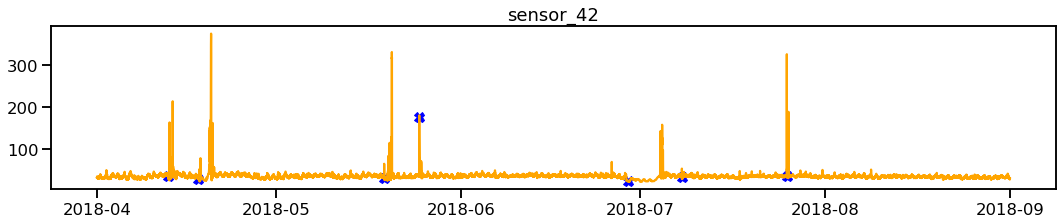

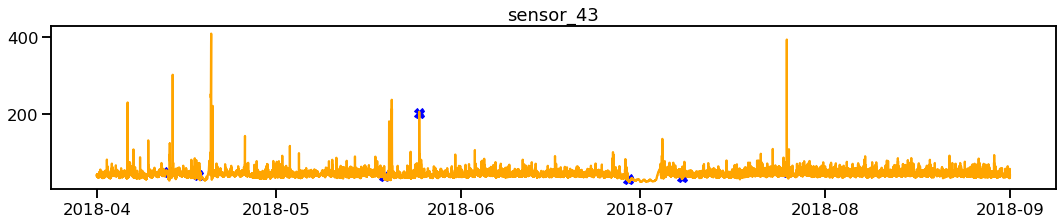

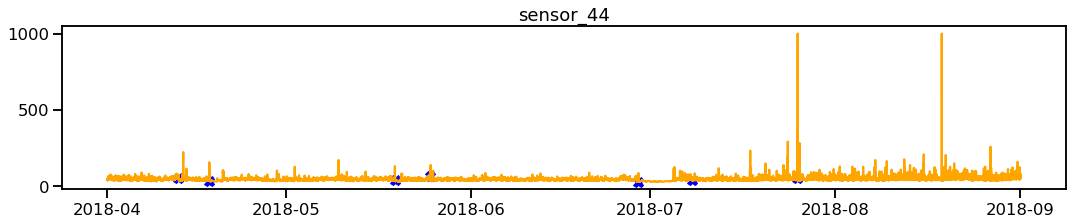

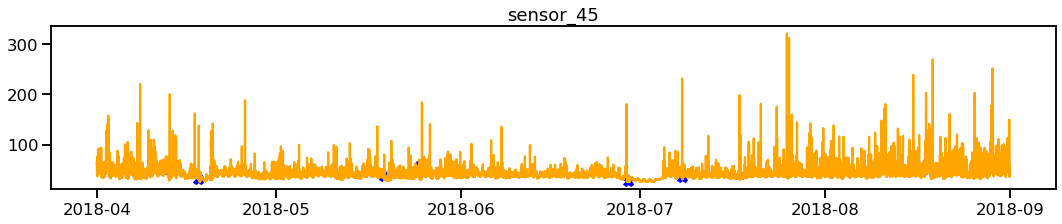

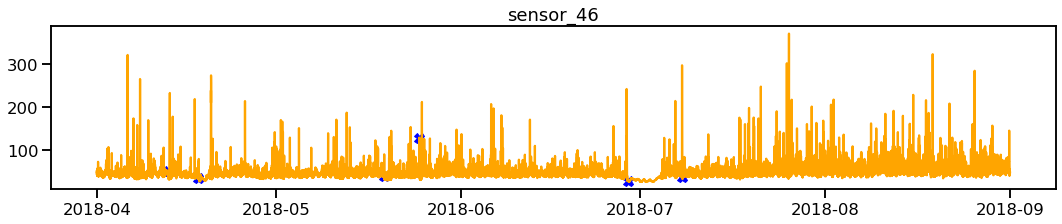

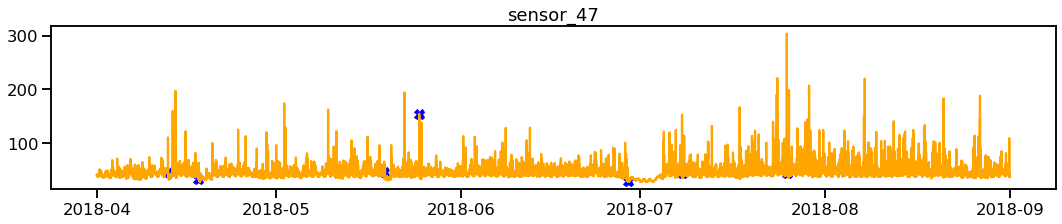

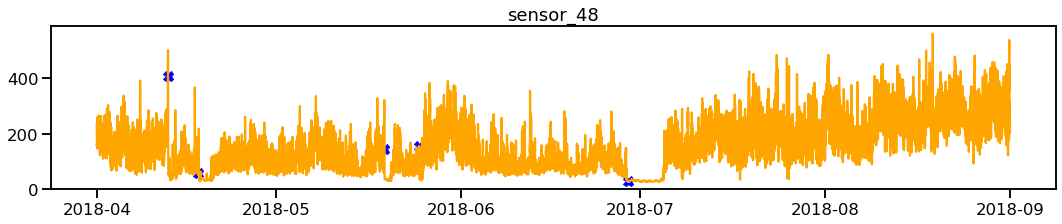

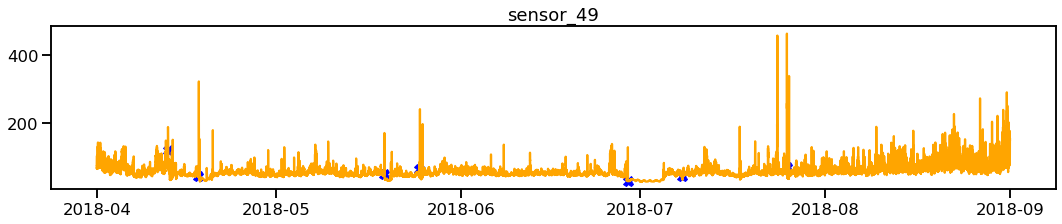

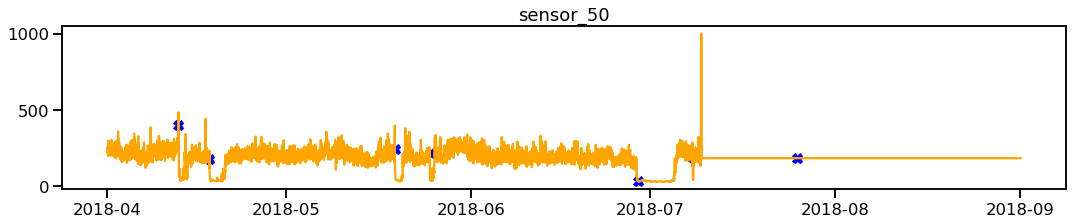

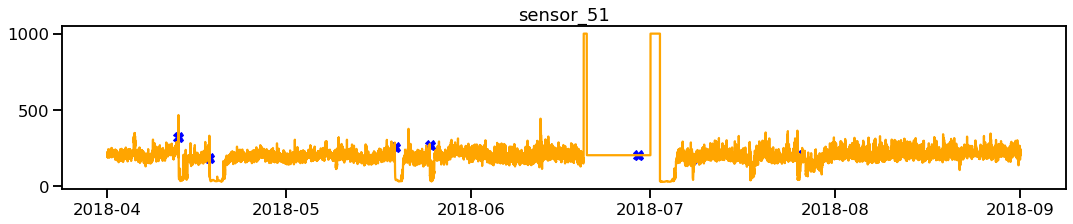

In [15]:
broken_dataframe= df[df['machine_status']=='BROKEN']
sensors_dataframe = df.drop(['machine_status'], axis=1)
sensorNames=sensors_dataframe.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken_dataframe[sensor], linestyle='none', marker='X', color='blue', markersize=10)
    _ = plt.plot(df[sensor], color='orange')
    _ = plt.title(sensor)
    plt.show()

In [16]:
x = df[sensorNames]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

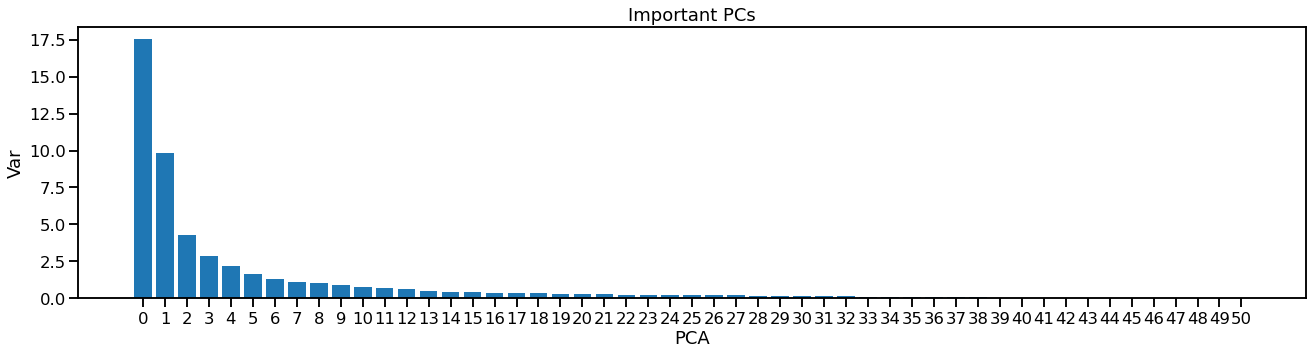

In [17]:
features_dataframe = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features_dataframe, pca.explained_variance_)
_ = plt.xlabel('PCA')
_ = plt.ylabel('Var')
_ = plt.xticks(features_dataframe)
_ = plt.title("Important PCs")
plt.show()

In [18]:
scaler = StandardScaler()
pca = PCA(n_components=3)
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

principal_elements = pipeline.fit_transform(x)
principal_dataframe = pd.DataFrame(data = principal_elements, columns = ['PC0', 'PC1','PC2'], index=x.index)

In [19]:
principal_dataframe.head()

,PC0,PC1,PC2
timestamp,,,
2018-04-01 00:00:00,0.002550,0.780245,-0.516116
2018-04-01 00:01:00,0.002550,0.780245,-0.516116
2018-04-01 00:02:00,-0.141313,0.785416,-0.487849
2018-04-01 00:03:00,-0.144197,0.819335,-0.536022
2018-04-01 00:04:00,-0.091573,0.931914,-0.400717


In [20]:
df['PC0']=pd.Series(principal_dataframe['PC0'].values, index=df.index)
df['PC1']=pd.Series(principal_dataframe['PC1'].values, index=df.index)
df['PC2']=pd.Series(principal_dataframe['PC2'].values, index=df.index)

In [21]:
q1_pc1, q3_pc1 = df['PC0'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

#PC1
q1_pc2, q3_pc2 = df['PC1'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
#PC2
q1_pc3, q3_pc3 = df['PC2'].quantile([0.25, 0.75])
iqr_pc3 = q3_pc3 - q1_pc3
lower_pc3 = q1_pc3 - (1.5*iqr_pc3)
upper_pc3 = q3_pc3 + (1.5*iqr_pc3)

In [22]:
print(lower_pc1, upper_pc1)
print(lower_pc2, upper_pc2)
print(lower_pc3, upper_pc3)

-3.590890360899487 0.9844766731676297
-2.976705480174859 4.248497740827369
-2.694429834889293 2.4252294862139827


In [23]:
df['anomaly_pc0'] = ((df['PC0']>upper_pc1) | (df['PC0']<lower_pc1)).astype('int')
df['anomaly_pc1'] = ((df['PC1']>upper_pc2) | (df['PC1']<lower_pc2)).astype('int')
df['anomaly_pc2'] = ((df['PC2']>upper_pc3) | (df['PC2']<lower_pc3)).astype('int')

In [24]:
print(df['anomaly_pc0'].value_counts())
print(df['anomaly_pc1'].value_counts())
print(df['anomaly_pc2'].value_counts())

0    191309
1     28212
Name: anomaly_pc0, dtype: int64
0    201438
1     18083
Name: anomaly_pc1, dtype: int64
0    208048
1     11473
Name: anomaly_pc2, dtype: int64


In [25]:
pc1_outliers = df.loc[(df['PC0']>upper_pc1) | (df['PC0']<lower_pc1), 'PC0']
pc2_outliers = df.loc[(df['PC1']>upper_pc2) | (df['PC1']<lower_pc2), 'PC1']
pc3_outliers = df.loc[(df['PC2']>upper_pc3) | (df['PC2']<lower_pc3), 'PC2']

In [26]:
print(len(pc1_outliers)/len(df))
print(len(pc2_outliers)/len(df))
print(len(pc3_outliers)/len(df))

0.1285161784066217
0.08237480696607614
0.05226379253009963


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = df.drop(['machine_status', 'PC0','PC1' ,'PC2', 'anomaly_pc0', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['machine_status']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10106.761967
12  sensor_12   9879.052739
4   sensor_04   8167.176442


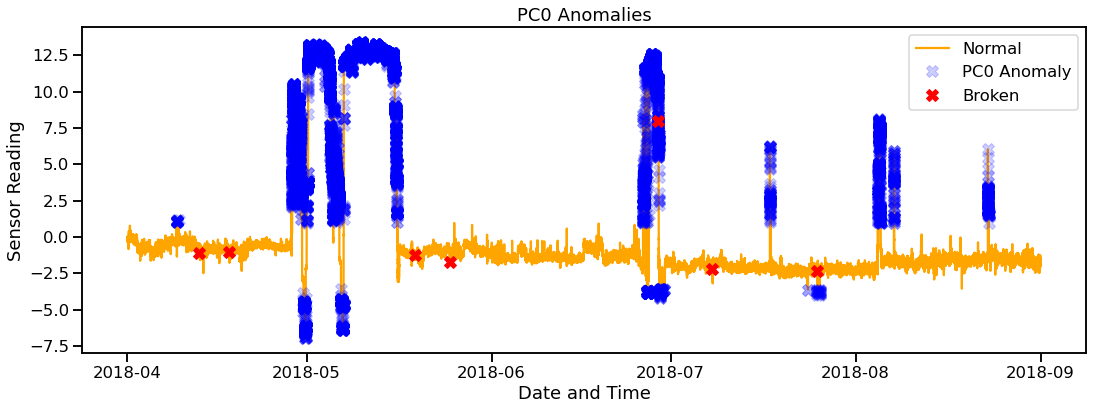

In [32]:
a = df[df['anomaly_pc0'] == 1] #anomaly
b = df[df['anomaly_pc1'] == 1]
c = df[df['anomaly_pc2'] == 1]
broken_dataframe = df[df['machine_status']=='BROKEN']
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['PC0'], color='orange', label='Normal')
_ = plt.plot(a['PC0'], linestyle='none', marker='X', color='blue', markersize=12, label='PC0 Anomaly', alpha = 0.2)
_ = plt.plot(broken_dataframe['PC0'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('PC0 Anomalies')
_ = plt.legend(loc='best')
plt.show();

NameError: name 'dfBroken' is not defined

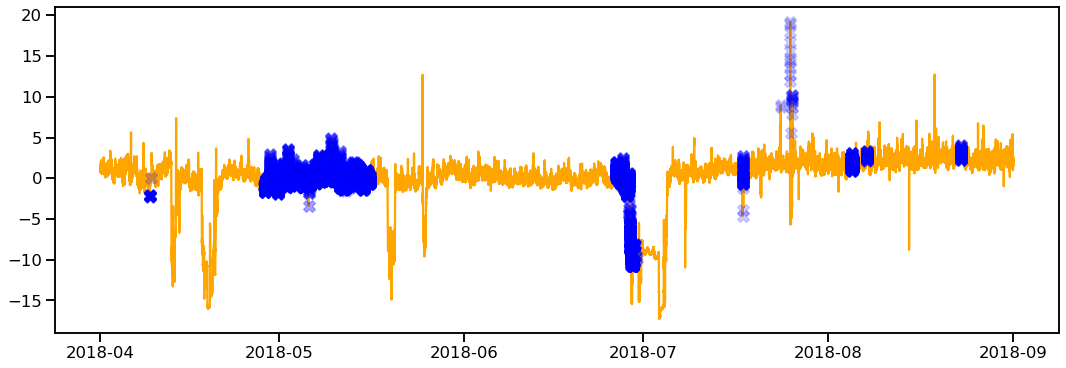

In [33]:
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['PC1'], color='orange', label='Normal')
_ = plt.plot(a['PC1'], linestyle='none', marker='X', color='blue', markersize=12, label='PC1 Anomaly', alpha = 0.2)
_ = plt.plot(dfBroken['PC1'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('PC1 Anomalies')
_ = plt.legend(loc='best')
plt.show();

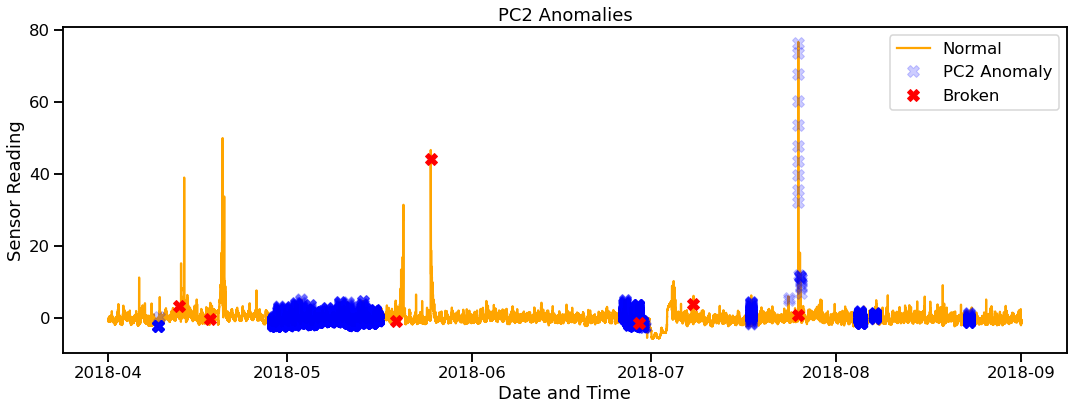

In [34]:
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['PC2'], color='orange', label='Normal')
_ = plt.plot(a['PC2'], linestyle='none', marker='X', color='blue', markersize=12, label='PC2 Anomaly', alpha = 0.2)
_ = plt.plot(broken_dataframe['PC2'], linestyle='none', marker='X', color='red', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('PC2 Anomalies')
_ = plt.legend(loc='best')
plt.show();